# DL_BASICS

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop, Adam, SGD
from keras.utils import np_utils
import matplotlib.pyplot as plt
import tensorflow as tf

np.random.seed(1671) 

NB_EPOCH = 30
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 

OPTIMIZER = Adam() 
N_HIDDEN = 128
VALIDATION_SPLIT=0.1

DROPOUT = 0.2

(X_train, y_train), (X_test, y_test) = mnist.load_data()

RESHAPED = 784

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)


Using TensorFlow backend.


60000 train samples
10000 test samples


Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 2s 35us/step - loss: 0.4275 - acc: 0.8721 - val_loss: 0.1344 - val_acc: 0.9635
Epoch 2/30
54000/54000 [==============================] - 1s 23us/step - loss: 0.1820 - acc: 0.9452 - val_loss: 0.0982 - val_acc: 0.9708
Epoch 3/30
54000/54000 [==============================] - 1s 23us/step - loss: 0.1377 - acc: 0.9582 - val_loss: 0.0801 - val_acc: 0.9765
Epoch 4/30
54000/54000 [==============================] - 1s 23us/step - loss: 0.1128 - acc: 0.9647 - val_loss: 0.0767 - val_acc: 0.9780
Epoch 5/30
54000/54000 [==============================] - 1s 23us/step - loss: 0.0974 - acc: 0.9696 - val_loss: 0.0704 - val_acc: 0.9790
Epoch 6/30
54000/54000 [==============================] - 1s 22us/step - loss: 0.0865 - acc: 0.9726 - val_loss: 0.0736 - val_acc: 0.9777
Epoch 7/30
54000/54000 [==============================] - 1s 23us/step - loss: 0.0774 - acc: 0.9757 - val_loss: 0.0682 - val_acc:

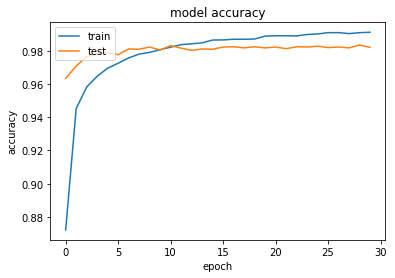

In [2]:
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])
history=model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH,verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
model.summary()
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])


plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()